In [486]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator
import os

import sklearn
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers


Show_MNIST


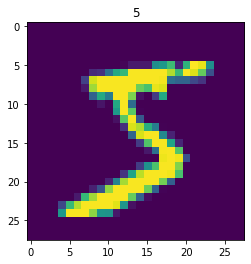

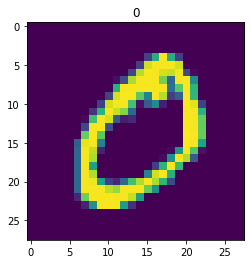

In [7]:
print('\nShow_MNIST')
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(X, y), (test_images, test_labels) = mnist.load_data()
classes = ['0', '1', '2','3','4','5','6','7','8','9']
for i in range(2):
    Image = np.reshape(X[i,:],(28,28)) # reshape data row as 28 x 28 image
    imshow(Image)
    plt.title(classes[y[i]])
    plt.show()

In [8]:
print(y.shape)

(60000,)


In [9]:
print(test_images.shape)

(10000, 28, 28)


In [10]:
print(test_labels.shape)

(10000,)


# Load data and reshape it

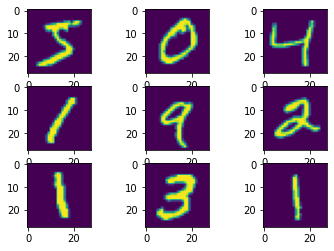

In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Set seed
np.random.seed(12345)
# create a grid of 3x3 images
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
# show the plot
plt.show()

# Feature Standardization

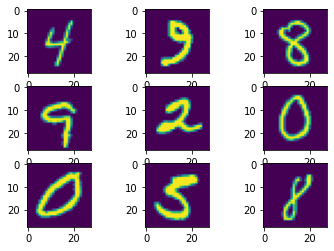

In [14]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, seed=123):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

# ZCA Whitening

/Users/liyuan/opt/anaconda3/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


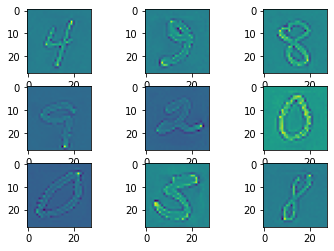

In [15]:
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, seed=123):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

# Random Rotations

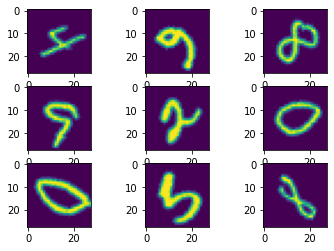

In [16]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, seed=123):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

# Random Shifts

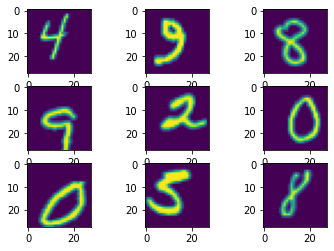

In [17]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, seed=123):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

# Random Flips

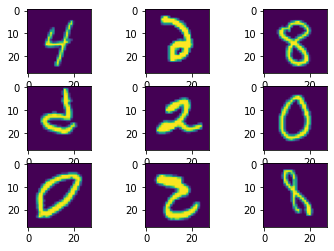

In [19]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, seed=123):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

# Saving Augmented Images to File

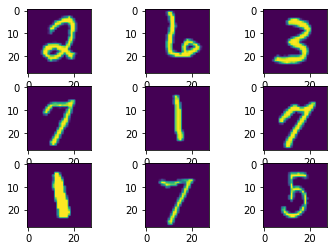

In [27]:
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28))
	# show the plot
	plt.show()
	break

## New augmentation using S as a minibatch to create one new image

In [143]:
def generator(num = 0, S = 50, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = X_train[y_train == num, :, :, :] # generate the class
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    plt.imshow(new)
    #return new

# parameter for 0

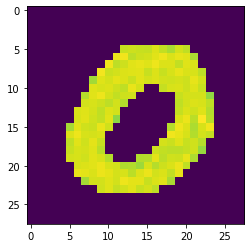

In [144]:
generator(num = 0, S = 50, p = 0.25, thre = 140)

# parameter for 1

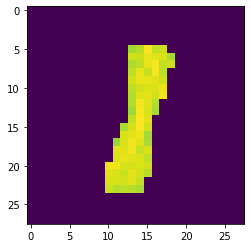

In [145]:
generator(num = 1, S = 50, p = 0.25, thre = 140)

# parameter for 2

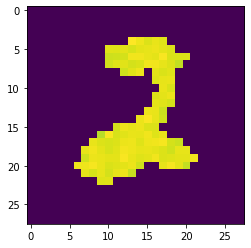

In [191]:
generator(num = 2, S = 50, p = 0.3, thre = 175)

# parameter for 3

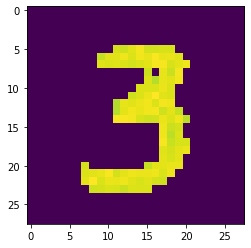

In [158]:
generator(num = 3, S = 50, p = 0.4, thre = 150)

# parameter for 4

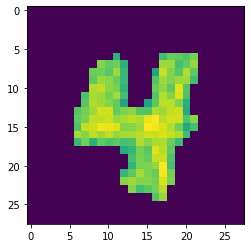

In [245]:
generator(num = 4, S = 50, p = 0.3, thre = 17)

# parameter for 5

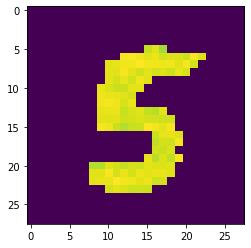

In [213]:
generator(num = 5, S = 50, p = 0.3, thre = 150)

# parameter for 6

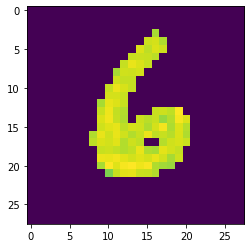

In [291]:
generator(num = 6, S = 50, p = 0.45, thre = 100)

# parameter for 7

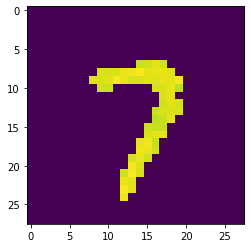

In [305]:
generator(num = 7, S = 50, p = 0.45, thre = 150)

# parameter for 8

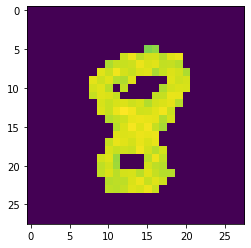

In [368]:
generator(num = 8, S = 50, p = 0.4, thre = 120)

# parameter for 9

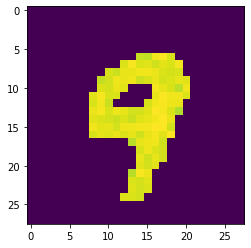

In [399]:
generator(num = 9, S = 50, p = 0.3, thre = 150)

# Seperate digit data

In [403]:
print(X_train[y_train == 0].shape,
X_train[y_train == 1].shape,
X_train[y_train == 2].shape,
X_train[y_train == 3].shape,
X_train[y_train == 4].shape,
X_train[y_train == 5].shape,
X_train[y_train == 6].shape,
X_train[y_train == 7].shape,
X_train[y_train == 8].shape,
X_train[y_train == 9].shape)

(5923, 28, 28, 1) (6742, 28, 28, 1) (5958, 28, 28, 1) (6131, 28, 28, 1) (5842, 28, 28, 1) (5421, 28, 28, 1) (5918, 28, 28, 1) (6265, 28, 28, 1) (5851, 28, 28, 1) (5949, 28, 28, 1)


In [404]:
X_train.shape

(60000, 28, 28, 1)

In [406]:
x0 = X_train[y_train == 0]
x1 = X_train[y_train == 1]
x2 = X_train[y_train == 2]
x3 = X_train[y_train == 3]
x4 = X_train[y_train == 4]
x5 = X_train[y_train == 5]
x6 = X_train[y_train == 6]
x7 = X_train[y_train == 7]
x8 = X_train[y_train == 8]
x9 = X_train[y_train == 9]

# Subset each class

In [421]:
np.random.seed(123)
x0_ind = np.random.choice(x0.shape[0], x0.shape[0]//2, False)
x1_ind = np.random.choice(x1.shape[0], x1.shape[0]//2, False)
x2_ind = np.random.choice(x2.shape[0], x2.shape[0]//2, False)
x3_ind = np.random.choice(x3.shape[0], x3.shape[0]//2, False)
x4_ind = np.random.choice(x4.shape[0], x4.shape[0]//2, False)
x5_ind = np.random.choice(x5.shape[0], x5.shape[0]//2, False)
x6_ind = np.random.choice(x6.shape[0], x6.shape[0]//2, False)
x7_ind = np.random.choice(x7.shape[0], x7.shape[0]//2, False)
x8_ind = np.random.choice(x8.shape[0], x8.shape[0]//2, False)
x9_ind = np.random.choice(x9.shape[0], x9.shape[0]//2, False)

In [438]:
x0_train = x0[x0_ind, :, :, :]
x1_train = x1[x1_ind, :, :, :]
x2_train = x2[x2_ind, :, :, :]
x3_train = x3[x3_ind, :, :, :]
x4_train = x4[x4_ind, :, :, :]
x5_train = x5[x5_ind, :, :, :]
x6_train = x6[x6_ind, :, :, :]
x7_train = x7[x7_ind, :, :, :]
x8_train = x8[x8_ind, :, :, :]
x9_train = x9[x9_ind, :, :, :]

# Combine each subclass

In [449]:
new_train = np.concatenate([x0_train, x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis = 0)
new_train.shape

(29997, 28, 28, 1)

In [457]:
np.array_equal(new_train[:x0_train.shape[0]], x0_train)

True

In [460]:
np.array_equal(new_train[x0_train.shape[0]:(x0_train.shape[0]+x1_train.shape[0])], x1_train)

True

In [469]:
new_y_train = np.array([0] * x0_train.shape[0] + 
[1] * x1_train.shape[0] + 
[2] * x2_train.shape[0] +
[3] * x3_train.shape[0] +
[4] * x4_train.shape[0] +
[5] * x5_train.shape[0] +
[6] * x6_train.shape[0] +
[7] * x7_train.shape[0] +
[8] * x8_train.shape[0] +
[9] * x9_train.shape[0])

# Shuffle new train data and labels

In [474]:
train, y = sklearn.utils.shuffle(new_train, new_y_train, random_state=0)

In [477]:
train.shape

(29997, 28, 28, 1)

# Train model with original data

In [483]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (29997, 28, 28, 1, 1)
29997 train samples
10000 test samples


In [487]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [488]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 6s 29ms/step - loss: 1.0985 - accuracy: 0.6577 - val_loss: 0.1502 - val_accuracy: 0.9540
Epoch 2/15
211/211 [==============================] - 6s 28ms/step - loss: 0.1845 - accuracy: 0.9469 - val_loss: 0.0988 - val_accuracy: 0.9710
Epoch 3/15
211/211 [==============================] - 6s 27ms/step - loss: 0.1226 - accuracy: 0.9630 - val_loss: 0.0903 - val_accuracy: 0.9720
Epoch 4/15
211/211 [==============================] - 6s 30ms/step - loss: 0.1034 - accuracy: 0.9668 - val_loss: 0.0658 - val_accuracy: 0.9797
Epoch 5/15
211/211 [==============================] - 6s 30ms/step - loss: 0.0875 - accuracy: 0.9712 - val_loss: 0.0585 - val_accuracy: 0.9803
Epoch 6/15
211/211 [==============================] - 6s 30ms/step - loss: 0.0745 - accuracy: 0.9761 - val_loss: 0.0576 - val_accuracy: 0.9810
Epoch 7/15
211/211 [==============================] - 6s 29ms/step - loss: 0.0646 - accuracy: 0.9786 - val_loss: 0.0541 - val_accuracy: 0.9830

In [489]:
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0326 - accuracy: 0.9879
Test loss: 0.032569292932748795
Test accuracy: 0.9879000186920166
